In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lecture 3, Notebook 1: Optimisers and Loss Functions

Tutorial by Mark Graham


## Optimisers
### Exercise 1.1 Gradient descent
In this section we'll dig into optimisers in more detail. So far, we have considered simple gradient descent. In gradient descent, the update rule is :

$$ \mathbf{W}_{t+1} = \mathbf{W}_{t}  - \eta \left.\dfrac{\partial J}{\partial \mathbf{W}}\right|_{w_{t}} $$

where $J$ is our cost function, $\mathbf{W}$ our parameters and $\eta$ our learning rate.

Let's implement gradient descent. 
Consider the following cost function for a simple two-parameter system:

$$ J = 40w_1^2 + 10 w_2^2 + 40 w_2$$

#### 1.1.1 Implement the cost function in the cell below.

In [4]:
import numpy as np

# the loss function
def cost(w1, w2):
    #### STUDENT'S ANSWER HERE ####
    # Answer (implement function)
    return 40*w1*w1+10*w2*w2+40*w2


Because our cost function is simple, we were able to calculate its minimum analytically.

#### 1.1.2 estimate the analytic mimina of a convex function

Calculate the partial derivatives analytically $\dfrac{\partial J}{\partial w_1}$ and $\dfrac{\partial J}{\partial w_2}$ so as to complete function below 

In [4]:
def calculate_gradient(w1,w2):
    #### STUDENT'S ANSWER HERE ####
    # Answer (calculate analytic derivatives):
    grad_w1 = 80*w1
    grad_w2 = 20*w2+40
    return (grad_w1, grad_w2)

#### 1.1.3. estimate the coordinates of the minima

Using your knowledge of differention (and partials estimted above), calculate the minima  of the cost $ J_{min}$ (together with the parameters at which the loss is minimised) $ w_{1min},w_{2min}$. Plug these in to run the  `plot_surface` function below

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will

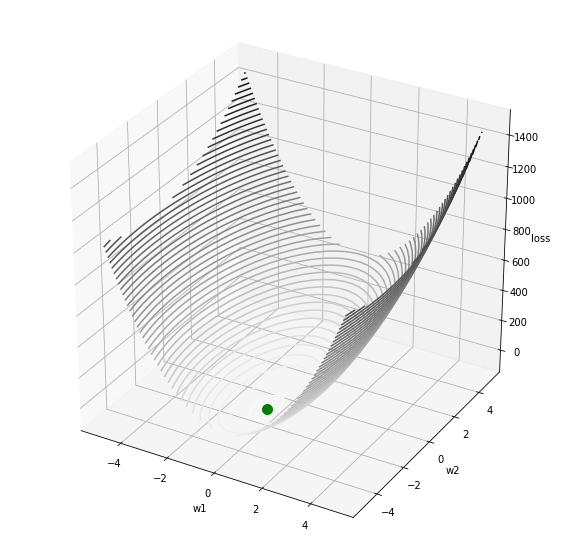

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# generate evenly spaced values 
w1 = np.linspace(-5, 5, 30)
w2 = np.linspace(-5, 5, 30)
W1, W2 = np.meshgrid(w1, w2)
# compute value of loss function for each parameter combination
costs = cost(W1, W2)
#### STUDENT'S ANSWER HERE ####
w_1min=0
w_2min=-2
L_min=-40

# plot
def plot_surface(W1,W2,cost_coords,minima):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.contour3D(W1, W2, costs, 50, cmap='binary')
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_zlabel('loss');
    # plot the minimum
    ax.scatter3D(minima[0], minima[1], minima[2], cost_coords,c='green',s = 100)
    return fig, ax


fig, ax = plot_surface(W1, W2, costs,[w_1min,w_2min,L_min])


Finally, we need a way of updating our parameters, making use of the gradient. 

#### 1.1.4 **Implement the gradient descent update rule** below.

In [6]:
class gradient_descent():
    def __init__(self, learning_rate):
        # we can store parameters of the descent algorithm here.
        self.lr = learning_rate

    def __call__(self, w1, w2, w1_grad, w2_grad):
        # our actual computation happens here.
        #### STUDENT'S ANSWER HERE ####
        # Answer:
        w1_updated = w1 - self.lr*w1_grad
        w2_updated = w2 - self.lr*w2_grad

        return w1_updated, w2_updated

We're now ready to perform gradient descent. **Run the following cell**, which calls your functions `loss_gradient` and `gradient_descent`:

epoch 0 , loss 960.000, w1 gradient: -320.000 w2 gradient: 120.000
epoch 1 , loss 647.760, w1 gradient: -243.200 w2 gradient: 112.800
epoch 2 , loss 454.588, w1 gradient: -184.832 w2 gradient: 106.032
epoch 3 , loss 331.681, w1 gradient: -140.472 w2 gradient: 99.670
epoch 4 , loss 250.679, w1 gradient: -106.759 w2 gradient: 93.690
epoch 5 , loss 195.046, w1 gradient: -81.137 w2 gradient: 88.068
epoch 6 , loss 155.097, w1 gradient: -61.664 w2 gradient: 82.784
epoch 7 , loss 125.115, w1 gradient: -46.865 w2 gradient: 77.817
epoch 8 , loss 101.695, w1 gradient: -35.617 w2 gradient: 73.148
epoch 9 , loss 82.776, w1 gradient: -27.069 w2 gradient: 68.759
epoch 10 , loss 67.083, w1 gradient: -20.572 w2 gradient: 64.634
epoch 11 , loss 53.809, w1 gradient: -15.635 w2 gradient: 60.756
epoch 12 , loss 42.423, w1 gradient: -11.883 w2 gradient: 57.110
epoch 13 , loss 32.559, w1 gradient: -9.031 w2 gradient: 53.684
epoch 14 , loss 23.957, w1 gradient: -6.863 w2 gradient: 50.463
epoch 15 , loss 16.4

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will

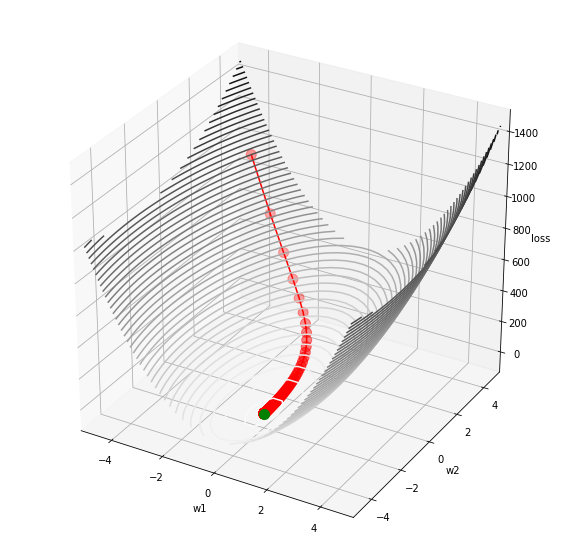

In [7]:
def plot_coords(w1_coords, w2_coords, loss_coords, axis):
    ax.plot3D(w1_coords,w2_coords,loss_coords,c='red')
    ax.scatter3D(w1_coords,w2_coords,loss_coords,c='red',s=100)
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5);
    ax.set_zlim(-100,1500)

# starting point
w1 = -4
w2 = 4

num_epochs = 200
lr = 0.003
# create our optimiser here
grad_descent = gradient_descent(learning_rate=lr)

# create empty lists to hold the coordinates
w1_coords, w2_coords, cost_coords = [], [], []
for epoch in range(num_epochs):
    w1_coords.append(w1)
    w2_coords.append(w2)
    Cost=cost(w1,w2)
    cost_coords.append(Cost)
    w1_grad, w2_grad =  calculate_gradient(w1,w2)
    w1, w2 = grad_descent(w1, w2, w1_grad, w2_grad)

    if (abs(w1_grad) > 0.01) or (abs(w2_grad) > 0.01):
        print('epoch {} , loss {:.3f}, w1 gradient: {:.3f} w2 gradient: {:.3f}'.format(epoch,Cost,w1_grad, w2_grad))
    else:
        break

# do the plotting
fig, ax = plot_surface(W1, W2, costs,[w_1min,w_2min,L_min])
plot_coords(w1_coords, w2_coords, cost_coords, ax)


It should work pretty well. Lets investigate some things:
- How sensitive is our solution to the learning rate? Try out different values in the above cell, both larger and smaller. What do you notice?
- Estimate how long it takes for out solution to converge, by altering the number of epochs at a fixed lr=0.003

### Exercise 1.2: Gradient descent with momentum
Momentum adds 'memory' to our gradient descent, averaging the gradient at the current step with gradients from previous steps. The update equations gradient descent with momentum are:

$$ \mathbf{z}_{t+1} = \beta   \mathbf{z}_{t} +  \eta \left.\dfrac{\partial J}{\partial \mathbf{W}}\right|_{\mathbf{W}_{t}} \\
\mathbf{W}_{t+1} = \mathbf{W}_{t}  -  \mathbf{z}_{t+1} $$

where $\beta$ is the momentum parameter and $\eta$ the learning rate. 

#### 1.2.1 **Implement the momentum update** in the cell below:

In [7]:
class gradient_descent_momentum():
    def __init__(self, momentum, learning_rate):
        # as well as the parameters momentum and lr, we need to store z_1 and z_2 between update steps.
        self.momentum = momentum
        self.lr = learning_rate
        self.z_1 = 0
        self.z_2 = 0
        
    def __call__(self, w1, w2, w1_grad, w2_grad):
        ### STUDENT CODE HERE####
        # Answer (implement z for each parameter using equation above):
        self.z_1 = self.momentum*self.z_1+self.lr*w1_grad
        self.z_2 = self.momentum*self.z_2+self.lr*w2_grad
        # To do - using above formula implement moment update
        w1_updated = w1-self.z_1 
        w2_updated = w2-self.z_2 
        return w1_updated, w2_updated    

The cell below calls the momentum update. **Run it**.

epoch 0 , loss 960.000, w1 gradient: -320.000 w2 gradient: 120.000
epoch 1 , loss 1272.000, w1 gradient: 448.000 w2 gradient: 48.000
epoch 2 , loss 147.456, w1 gradient: -166.400 w2 gradient: -24.000
epoch 3 , loss 144.753, w1 gradient: -135.680 w2 gradient: -52.800
epoch 4 , loss 268.263, w1 gradient: 208.384 w2 gradient: -38.400
epoch 5 , loss 6.604, w1 gradient: -85.299 w2 gradient: -6.720
epoch 6 , loss -13.184, w1 gradient: -56.791 w2 gradient: 16.320
epoch 7 , loss 28.692, w1 gradient: 96.612 w2 gradient: 20.352
epoch 8 , loss -25.540, w1 gradient: -43.215 w2 gradient: 10.560
epoch 9 , loss -36.511, w1 gradient: -23.395 w2 gradient: -1.651
epoch 10 , loss -25.948, w1 gradient: 44.645 w2 gradient: -7.987
epoch 11 , loss -35.839, w1 gradient: -21.679 w2 gradient: -6.996
epoch 12 , loss -39.321, w1 gradient: -9.444 w2 gradient: -2.204
epoch 13 , loss -37.258, w1 gradient: 20.563 w2 gradient: 1.994
epoch 14 , loss -38.998, w1 gradient: -10.784 w2 gradient: 3.316
epoch 15 , loss -39.8

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will

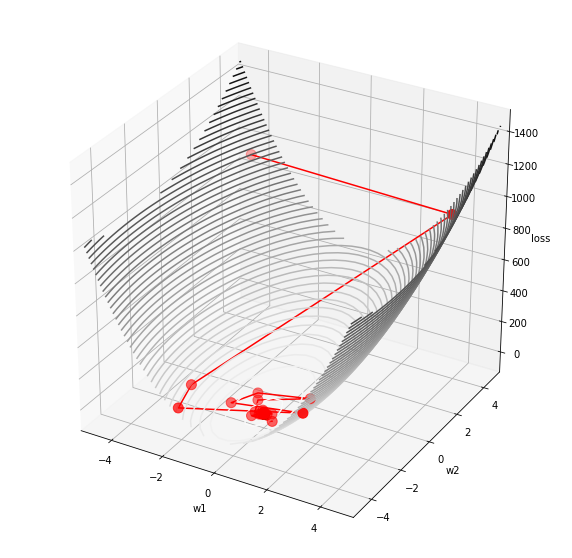

In [ ]:
# starting point
w1 = -4
w2 = 4

num_epochs = 100
lr = 0.03
momentum = 0.6
gradient_descent_mom = gradient_descent_momentum(momentum=momentum, learning_rate=lr)

# create empty lists to hold the coordinates
w1_coords, w2_coords, cost_coords = [], [], []
for epoch in range(num_epochs):
    w1_coords.append(w1)
    w2_coords.append(w2)
    Cost=cost(w1,w2)
    cost_coords.append(Cost)
    w1_grad, w2_grad =  calculate_gradient(w1,w2)
    w1, w2 = gradient_descent_mom(w1,w2, w1_grad, w2_grad)
    if (abs(w1_grad) > 0.01) or (abs(w2_grad) > 0.01):
        print('epoch {} , loss {:.3f}, w1 gradient: {:.3f} w2 gradient: {:.3f}'.format(epoch,Cost,w1_grad, w2_grad))
    else:
        break

# # do the plotting
fig, ax = plot_surface(W1, W2, costs,[w_1min,w_2min,L_min])
plot_coords(w1_coords, w2_coords, cost_coords, ax)

Now play with the momentum parameters:
1. What do you notice about the convergence speed of momentum compared to gradient descent? 
2. Vary the learning rate. What do you notice about higher learning rates, compared to gradient descent?

### Exercise 1.3: RMSProp
RMSProp also keeps a 'memory', but here it uses this memory to moderate the learning rate for each parameter independently, so that smaller steps are taken in directions with larger gradients. The update equations are:

$$ \mathbf{v}_{t+1} = \beta   \mathbf{v}_{t} +  (1-\beta) \left( \left.\dfrac{\partial J}{\partial \mathbf{W}}\right|_{w_{t}}\right)^2 \\
\mathbf{W}_{t+1} = \mathbf{W}_{t}  - \dfrac{\eta}{\sqrt{\mathbf{v}_{t+1} + \epsilon}} \circ  \left.\dfrac{\partial J}{\partial \mathbf{W}}\right|_{w_{t}} $$

The update looks complicated, but compare with the gradient descent update. They're the same, except the learning rate $\eta$ is divided by a scalar that is calculated at each update step. 

#### 1.3.1. **Implement the RMSProp update** step below.

As we have only 2 parameters, implement the updates for each one separately by:

- estimating `self.v1` and `self.v2` correspending to $\mathbf{v}_{t+1}$ for each parameter. This implements an exponential average of the square of the gradient with respect to each parameter
- estimate `lr_1` and `lr_2` the learning rate correction ($\dfrac{\eta}{\sqrt{\mathbf{v}_{t+1} + \epsilon}}$) for each parameter 
- update weights for each parameter (`w1_updated`, `w2_updated`)

In [ ]:
class RMSProp():
    def __init__(self, momentum, learning_rate):
        self.momentum = momentum
        self.lr = learning_rate
        self.v_1 = 0
        self.v_2 = 0
        self.epsilon = 1e-5
        
    def __call__(self, w1, w2, w1_grad, w2_grad):
        
        ### STUDENT CODE HERE####
        self.v_1 = self.v_1 * self.momentum + pow(w1_grad,2) * (1-self.momentum)
        self.v_2 = self.v_2 * self.momentum + pow(w2_grad,2) * (1-self.momentum)
        lr_1 = self.lr / np.sqrt(self.v_1 + self.epsilon)
        lr_2 = self.lr / np.sqrt(self.v_2 + self.epsilon)
        
        w1_updated = w1 - lr_1 * w1_grad
        w2_updated = w2 - lr_2 * w2_grad
        return w1_updated, w2_updated    

Lets use RMSProp - **run the cell below**, which calls your implementation.

epoch 0 , loss 960.000, w1 gradient: -320.000 w2 gradient: 120.000
epoch 1 , loss 389.299, w1 gradient: -193.509 w2 gradient: 88.377
epoch 2 , loss 177.443, w1 gradient: -125.518 w2 gradient: 68.985
epoch 3 , loss 76.820, w1 gradient: -81.884 w2 gradient: 54.740
epoch 4 , loss 24.855, w1 gradient: -52.689 w2 gradient: 43.591
epoch 5 , loss -3.184, w1 gradient: -33.126 w2 gradient: 34.616
epoch 6 , loss -18.800, w1 gradient: -20.228 w2 gradient: 27.308
epoch 7 , loss -27.724, w1 gradient: -11.944 w2 gradient: 21.339
epoch 8 , loss -32.921, w1 gradient: -6.792 w2 gradient: 16.482
epoch 9 , loss -35.972, w1 gradient: -3.705 w2 gradient: 12.557
epoch 10 , loss -37.758, w1 gradient: -1.930 w2 gradient: 9.421
epoch 11 , loss -38.787, w1 gradient: -0.956 w2 gradient: 6.949
epoch 12 , loss -39.366, w1 gradient: -0.447 w2 gradient: 5.030
epoch 13 , loss -39.682, w1 gradient: -0.196 w2 gradient: 3.567
epoch 14 , loss -39.847, w1 gradient: -0.080 w2 gradient: 2.475
epoch 15 , loss -39.930, w1 gra

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will

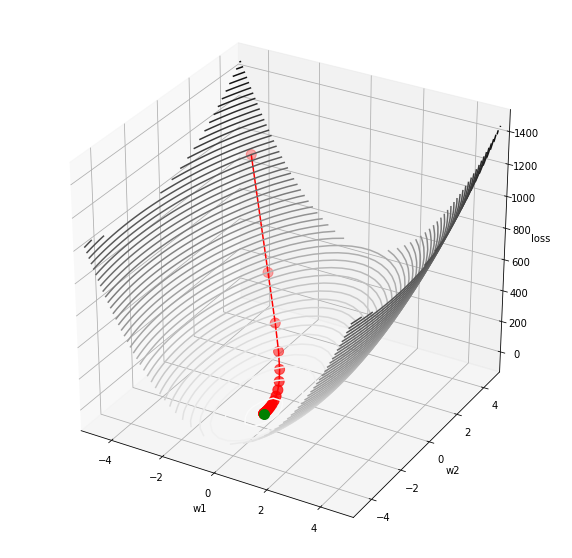

In [ ]:
# starting point
w1 = -4
w2 = 4

num_epochs = 30
lr = 0.5
momentum = 0.9
rmsprop = RMSProp(momentum=momentum, learning_rate=lr)

# create empty lists to hold the coordinates
w1_coords, w2_coords, cost_coords = [], [], []
for epoch in range(num_epochs):
    w1_coords.append(w1)
    w2_coords.append(w2)
    Cost=cost(w1,w2)
    cost_coords.append(Cost)
    w1_grad, w2_grad =  calculate_gradient(w1,w2)
    w1, w2 = rmsprop(w1,w2, w1_grad, w2_grad)
    if (abs(w1_grad) > 0.01) or (abs(w2_grad) > 0.01):
        print('epoch {} , loss {:.3f}, w1 gradient: {:.3f} w2 gradient: {:.3f}'.format(epoch,Cost,w1_grad, w2_grad))
    else:
        break

# do the plotting
fig, ax = plot_surface(W1, W2, costs,[w_1min,w_2min,L_min])
plot_coords(w1_coords, w2_coords, cost_coords, ax)

Play with the learning rate and momentum. What do you notice about the learning rate needed compared to previous update rules? What about the speed of convergence?

### Stochastic gradient descent

In order to investigate optimisers here, we've been analysing a simple, quadratic cost function with parameters that are known to us. This made it straightforward to calculate both the cost and its gradient for any set of parameters, $w_1,w_2$. However, in a practical ML application we won't have this nice functional form for the cost. For a simple two parameter regression problem, the loss would take the form:

$$ J = \frac{1}{N} \sum_{i=1}^{N } (y_i - x_{1i}w_1 - x_{2i}w_2)^2$$

We can see the cost will still be quadratic in our two parameters $w_1,w_2$ but will depend on our $N$ training data points $\{\mathbf{x_i}, y_i\}$. At each iteration we will need to run our model over the full dataset to calculate the cost and gradient. Recall that we did this when we trained our MLP on the preterm dataset in lecture 1. Specfically we implemented it as a per example _loss_ which we averaged at each iteration.

If $N$ is very large, or we have a large model with lots of parameters (e.g. a neural network) it can be time-consuming and memory-intensive to run through the full dataset to get the gradients for our next parameter updates. In practice, we calculate the cost and gradients for a randomly chosen subset of the data at each iteration, approximating the cost and the gradients at that point. This has the effect of giving us noisy gradient updates - we don't necessarily take the optimal step at each iteration, but sometimes this can help us avoid/jump out of local minima.

### Exercise 4: Stochastic gradient descent for real data

Let's repeat our training loop from lecture 1, this time using SGD.

First let's create custon Dataset and Dataloader class for our brain data. Here, any preprocessing to be run on the whole data set should be run _only once_, and thus should go in the `__init__` function. 

**1.4.1 Complete the `__len__` and `__getitem__` methods** 
Check that the class returns the number of items and feature bvector lengths that you expect

**Don't forget to upload the data to colab and edit the path to match where you load it to**

In [8]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset

epsilon=1e-5

class PretermDataset(Dataset):
    # init loads the data in exactly the same way we did in lecture 1
    def __init__(self):     
        # Read the data
        # TO DO - EDIT PATH
        df = pd.read_pickle("/content/drive/My Drive/Colab Notebooks/Colab_Data/week2-Data/prem_vs_termwrois.pkl")
        data = df.values[:,:-2].T
        y = df.values[:,-1]

        # perform any preprocessing required across whole dataset 
        # as getitem processes one at a time 
        # thus 1) add a row of ones for multiplication with bias term
        X = np.concatenate((np.ones((1,data.shape[1])),data))
        
        # 2) normalise X to mean zero and standard deviation of 1
        X_centred = np.ones_like(X)
        X_centred[1:] = (X[1:] -X[1:].mean(axis=1,keepdims=True))
        / (X[1:].std(axis=1,keepdims=True)+epsilon)

        # store X and y in the class 
        #so they can be accessed by other functions
        self.X = X_centred
        self.y =  y
    
    def __len__(self):
        # STUDENTS COMPLETE
        return len(self.y)
    
    def __getitem__(self, idx):
        # STUDENTS COMPLETE
        # here most of the work already been done for you as pre-processing needed to be applied
        # across the group in the constructor
        # return a sample from your data set as tuple 
        data= torch.from_numpy(self.X[:,idx]).to(torch.float)
       
        label= torch.from_numpy(np.asarray(self.y[idx])).to(torch.long)
        #print('shape', label.shape,label)
        sample=data,label
        return sample

dataset = PretermDataset()
print('Number of entries in dataset: {}'.format(len(dataset)))
x, y = dataset[5]
print('Shape of one item in x: {}'.format(x.shape))

Number of entries in dataset: 101
Shape of one item in x: torch.Size([301])


**1.4.2 create a dataloader to iterate through your class**

Initially set `batch_size` to equal the total number of examples

In [11]:
learning_rate = 0.01
# STUDENTS COMPLETE
batch_size = 101 # propose batch size
optimiser=gradient_descent_momentum(0.9,learning_rate)
dataloader =  DataLoader(dataset,batch_size, shuffle=True)# create a (default) PyTorch dataloader for this dataset

### 1.4.3 **Implement the training loop**
Update the MLP training loop from notebook 1.1-fundamentals-solutions.ipynbSee to allow for training with batches of variable  sizes (using a dataloader)

We have copied in the functions you need - just create the training loop

 -  Note! you will need to convert your numpy arrays/operations to torch tensors/operations

Training with a batch size of 101


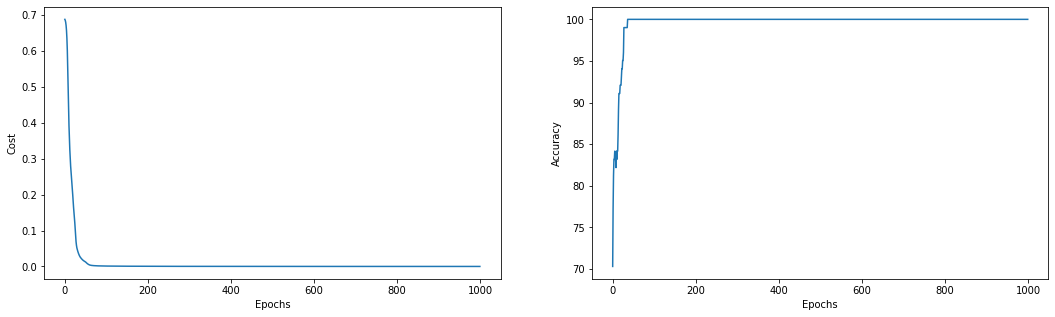

In [17]:
import matplotlib.pyplot as plt

epsilon = 1e-5

# initialise w1, w2
W1 = torch.randn(5,301)*0.1
W2 = torch.randn(1,5)*0.1

# we'll store the cost and accuracy in these lists during training
cost_record_mlp = []
accuracy_record_mlp = []

num_iterations = 1000


def relu(x):
    return x * (x>=0)

def f(z):
    return 1 / (1+ torch.exp(-z))


def cost(y, y_pred):
    epsilon = 1e-5
    # note the negative sign so that the loss decreases as our predictions get better
    # we must add a small penaty term to prevent calculation of log(0)
    L = - y * torch.log(y_pred+epsilon) - (1-y) * torch.log(1-y_pred+epsilon) 
    J = torch.mean(L)# averaging the loss to give cost
    return J

def accuracy(y, y_pred, threshold = 0.5):
    y_pred_thresholded = y_pred > threshold
    correct_predictions = torch.sum(y==y_pred_thresholded)  
    total_predictions = len(y)
    accuracy = 100 * correct_predictions / total_predictions
    return accuracy

for i in range(num_iterations):
    # STUDENTS CODE - implement training loop
    # as before implement the forwards and backwards pass with update
    # but this time use a dataloader to iterate
    for j, (data, labels) in enumerate(dataloader, 0):
      Z1 = torch.matmul(W1,data.T)
      F1 = relu(Z1)
      Z2 = torch.matmul(W2,F1)
      F2 = f(Z2) # recall f is the sigmoid function
      l = cost(labels,F2) 
      # store the loss/ accuracy at this iteration
      cost_record_mlp.append(l)
      accuracy_record_mlp.append(accuracy(labels,F2))

      
      #backwards pass to get gradients
      dL_dW2=torch.matmul(F2-labels,F1.T) 
      dL_df1=torch.matmul((F2-labels).T,W2)  
      df1_dZ1  = 1.0 *(Z1> 0)
      
      dL_dZ1=torch.multiply(dL_df1.T,df1_dZ1)
      dL_dW1 = torch.matmul(dL_dZ1,data)
      dJ_dW2=(1/W2.shape[0])*dL_dW2 
      dJ_dW1=(1/W1.shape[0])*dL_dW1 

      # update the weights
      W1,W2=optimiser(W1, W2, dJ_dW1, dJ_dW2)
      #W2 = W2 - learning_rate * dJ_dW2   
      #W1 = W1 - learning_rate * dJ_dW1

 
# plot loss and accuracy    
print('Training with a batch size of {}'.format(batch_size))
fig, ax = plt.subplots(1,2, figsize = (18,5))
ax[0].plot(cost_record_mlp)
ax[1].plot(accuracy_record_mlp)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Cost')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy');

### 1.4.4 **Investigate the influence of batch size**
The code below recreates the MLP training we implemented in lecture 1, except at every iteration it loops through all the batches in the dataloader. 

1. For a batch size = N, (in this case N=101) we have gradient descent and the training curves should look similar to the training curves in lecture 1. Verify this is the case.
2. Reduce the batch size to implement stochastic gradient descent - what do you notice about the training curves?

## Loss functions

### **Exercise 5: Generalised dice overlap**
The GDL can be used for multiclass segmentation - the full paper is [here](https://arxiv.org/pdf/1707.03237.pdf). Let's implement it.

First let's load in the data: a 2D slice from a T1 image, segmented into 7 classes. We have both a ground truth label and a label predicted by a partially trained neural network:

In [5]:
file= np.load('/content/drive/My Drive/Colab Notebooks/Colab_Data/week2-Data/images.npz')
image = file['arr_0']
ground_truth = file['arr_1']
pred = file['arr_2']
labels = {0: 'Background',
          1: 'CSF',
          2: 'Basal Ganglia',
          3: 'Cortex',
          4: 'Brainstem',
          5: 'Cerebellum',
          6 : 'White matter'}

Run the following cell to plot the data:

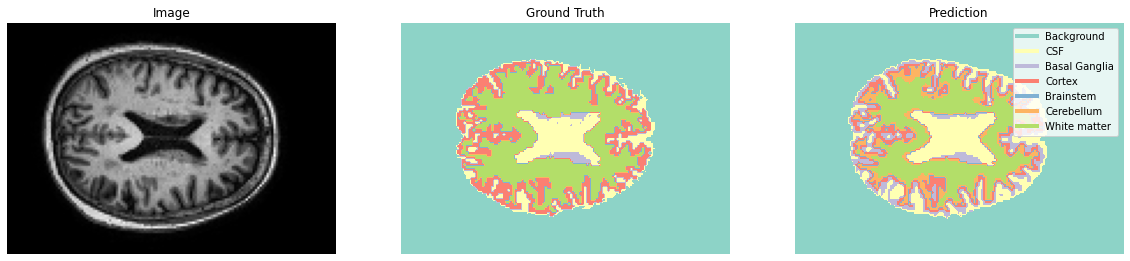

In [6]:
import seaborn as sns
from matplotlib import colors
from matplotlib.lines import Line2D

rgb_values = sns.color_palette("Set3", 7)
cmap = colors.ListedColormap(rgb_values, N=7)
custom_lines = [Line2D([0], [0], color=rgb_values[i], lw=4) for i in range(7)]

fig = plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.imshow(image,cmap='gray'); plt.axis('off'); plt.title('Image')
plt.subplot(1,3,2)
plt.imshow(ground_truth,cmap=cmap, vmin=0, vmax=6); plt.axis('off');plt.title('Ground Truth');
plt.subplot(1,3,3)
plt.imshow(pred,cmap=cmap, vmin=0, vmax=6); plt.axis('off'); plt.title('Prediction');
plt.legend(custom_lines, labels.values(),loc='best', fontsize = 'medium');

The GDL can be expressed as 

$$
\mathrm{GDL}=1-2 \frac{\sum_{l=1}^{K} w_{l} \sum_{n} y_{l n} \hat{y}_{l n}}{\sum_{l=1}^{K} w_{l} \sum_{n}( y_{l n}+\hat{y}_{l n})}
$$

where $y$ is the true segmentation map, $\hat{y}$ the predicted class label, $w_l$ is a weight for each class (out of $K$ in total); subscript $l$ refers to the class, and $n$ each pixel in the image. The class weight is estimated from 
$$1 /\left(\sum_{n=1}^{N} y_{l n}\right)^{2}$$ 
Which gives higher weight to classes with fewer examples.

The first stage is to one-hot encode the segmentation maps, transforming them from a $WxH$ array to a $CxWxH$ array where each channel contains a binary segmentation mask for each class.

### 1.5.1 Implement a function to one hot encode the segmentation maps

**hint** you will need to loop over all classes and, for each class $i$,  create a binary segmentation (of dimensions equal to the original image) with values 1 (where voxel belongs to class $i$) and 0 (where it does not)

In [7]:
def one_hot_encode(mask, num_classes):
    # here we initialise an empty mask for one hot encoding, with shape (num_classes, image_width,image_depth
    mask_encoded = np.zeros((num_classes,mask.shape[0], mask.shape[1]))
    #### STUDENT CODE HERE####
    # Code up a loop to fill mask_encoded; for each class we expect ones only in the location of that region
    # Answer e.g.:
    
    for i in np.arange(mask.shape[0]):
      for j in np.arange(mask.shape[1]):
        mask_encoded[mask[i,j],i,j]=1

    
    return mask_encoded

Check the encoding makes sense. Run the following cell to one-hot encode and plot each class seperately:

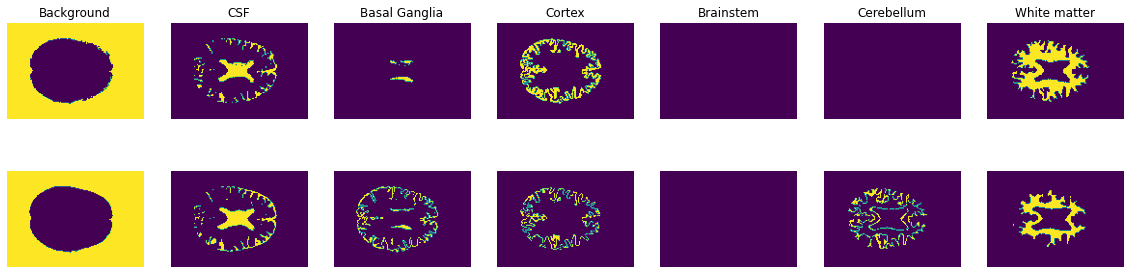

In [8]:
ground_truth_encoded = one_hot_encode(ground_truth, num_classes=7)
prediction_encoded = one_hot_encode(pred, num_classes=7)

plt.figure(figsize=(20,5))
for i in range(7):
    plt.subplot(2,7,i+1)
    plt.imshow(ground_truth_encoded[i,:,:]); plt.axis('off')
    plt.title(labels[i])
    plt.subplot(2,7,i+8)
    plt.imshow(prediction_encoded[i,:,:]); plt.axis('off')

### 1.5.2.  Implement the GDL: 

The function can be implemented without looping over all voxels, provided you make use of numpy vectorisation, complete the below function to estimate
- the numerator $\sum_{l=1}^{K} w_{l} \sum_{n} y_{l n} \hat{y}_{l n}$
- the denominator $\sum_{l=1}^{K} w_{l} \sum_{n}( y_{l n}+\hat{y}_{l n})$
- the complete GDL 

We suggest a correction for division by zero by setting `weight=epsilon` in these circumstances.

In [ ]:
#@title **Hints (double click to see)**
#One way to implement the GDL using vectorisation (per class) would be to: 
    # 1) looping over all classes
    # 2) estimating the weight, numerator and demonimator **for that class**
    # 3) recursively sum over all classes

#Note be careful to avoid any divide by zeros

In [29]:
def gdl(truth, prediction):
    # an example using vectorisation
    num_classes = truth.shape[0]
    weights_sum=np.power(np.apply_over_axes(np.sum, truth, [1,2]),2) # estimate the denominator of the weights
    # making use of numpy ufuncs to avoid divides by zeros
    # see https://stackoverflow.com/questions/26248654/how-to-return-0-with-divide-by-zero
    weights=np.divide(1,weights_sum,where=weights_sum!=0).squeeze() 
    # calculate the numerator through dot product of weights and per channel sum of y*y_hat
    numerator = np.dot(weights.T,np.apply_over_axes(np.sum,truth*prediction,[1,2]).squeeze())
    # calculate the denominator through dot product of weights and per channel sum of y+y_hat
    denominator = np.dot(weights.T,np.apply_over_axes(np.sum,truth+prediction,[1,2]).squeeze())
  
    return 1 -  2* np.divide(numerator, denominator,where=denominator!=0) # careful again to avoid divide by zero

Let's get the loss value for our example:

In [30]:
gdl(ground_truth_encoded, prediction_encoded)

0.7959229052331763

And sanity check: do we get a loss of 0 when our ground truth and prediction exactly match?

In [31]:
gdl(ground_truth_encoded, ground_truth_encoded)

0.0